In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

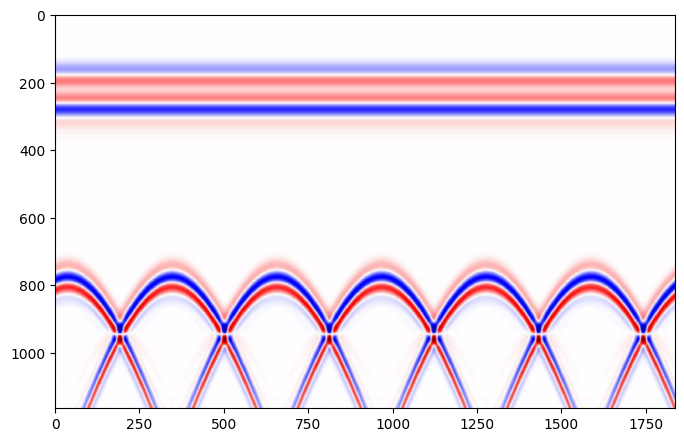

In [5]:
img = cv2.imread('your_image_converted.jpg')
# if img.dtype == np.object:
#     img = img.astype('uint8')
plt.figure(figsize = (8,8))
plt.imshow(img)

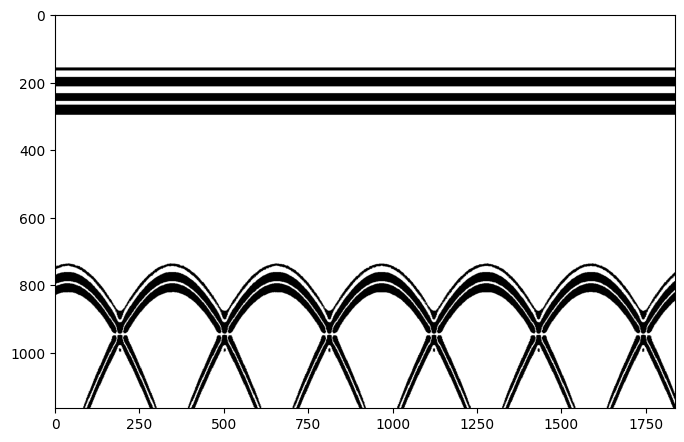

Binary image saved as binary_image.jpg


In [10]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret_val, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(8, 8))
plt.imshow(binary_image, cmap='gray')
plt.show()

output_file = 'binary_image.jpg'
cv2.imwrite(output_file, binary_image)
print(f"Binary image saved as {output_file}")

In [8]:
import cv2
import os
from pathlib import Path
from tqdm import tqdm

def process_image(image_path, output_dir):
    # Read the image
    img = cv2.imread(str(image_path))
    
    # Convert to grayscale
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply Otsu's thresholding
    _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Construct the output path
    output_path = output_dir / image_path.relative_to(input_dir)
    output_path.parent.mkdir(parents=True, exist_ok=True)
    
    # Save the binary image
    cv2.imwrite(str(output_path), binary_image)

def process_directory(input_dir, output_dir):
    input_dir = Path(input_dir)
    output_dir = Path(output_dir)

    # Prepare a list of image files to process
    image_files = [Path(root) / file for root, _, files in os.walk(input_dir) for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
    
    # Process each image with a progress bar
    for image_path in tqdm(image_files, desc="Processing images"):
        process_image(image_path, output_dir)

# Specify the input and output directories
input_dir = 'dataset'
output_dir = 'out'

# Process the directory
process_directory(input_dir, output_dir)


Processing images: 0it [00:00, ?it/s]
